<a href="https://colab.research.google.com/github/elahekarimi/CNN-IMGNET/blob/main/firstpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import datetime
import random

In [26]:
tf.__version__

'2.15.0'

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
y_train.shape

(50000, 1)

In [30]:
x_test.shape

(10000, 32, 32, 3)

In [31]:
y_test.shape

(10000, 1)

[3]


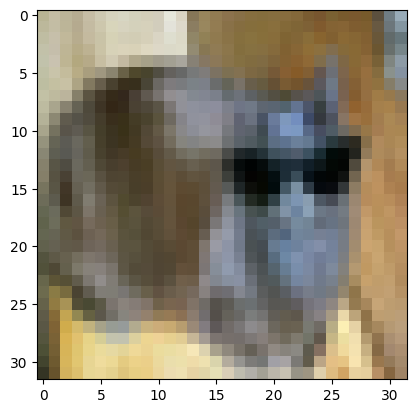

In [4]:
i = 995
plt.imshow(x_test[i])
print(y_train[i])

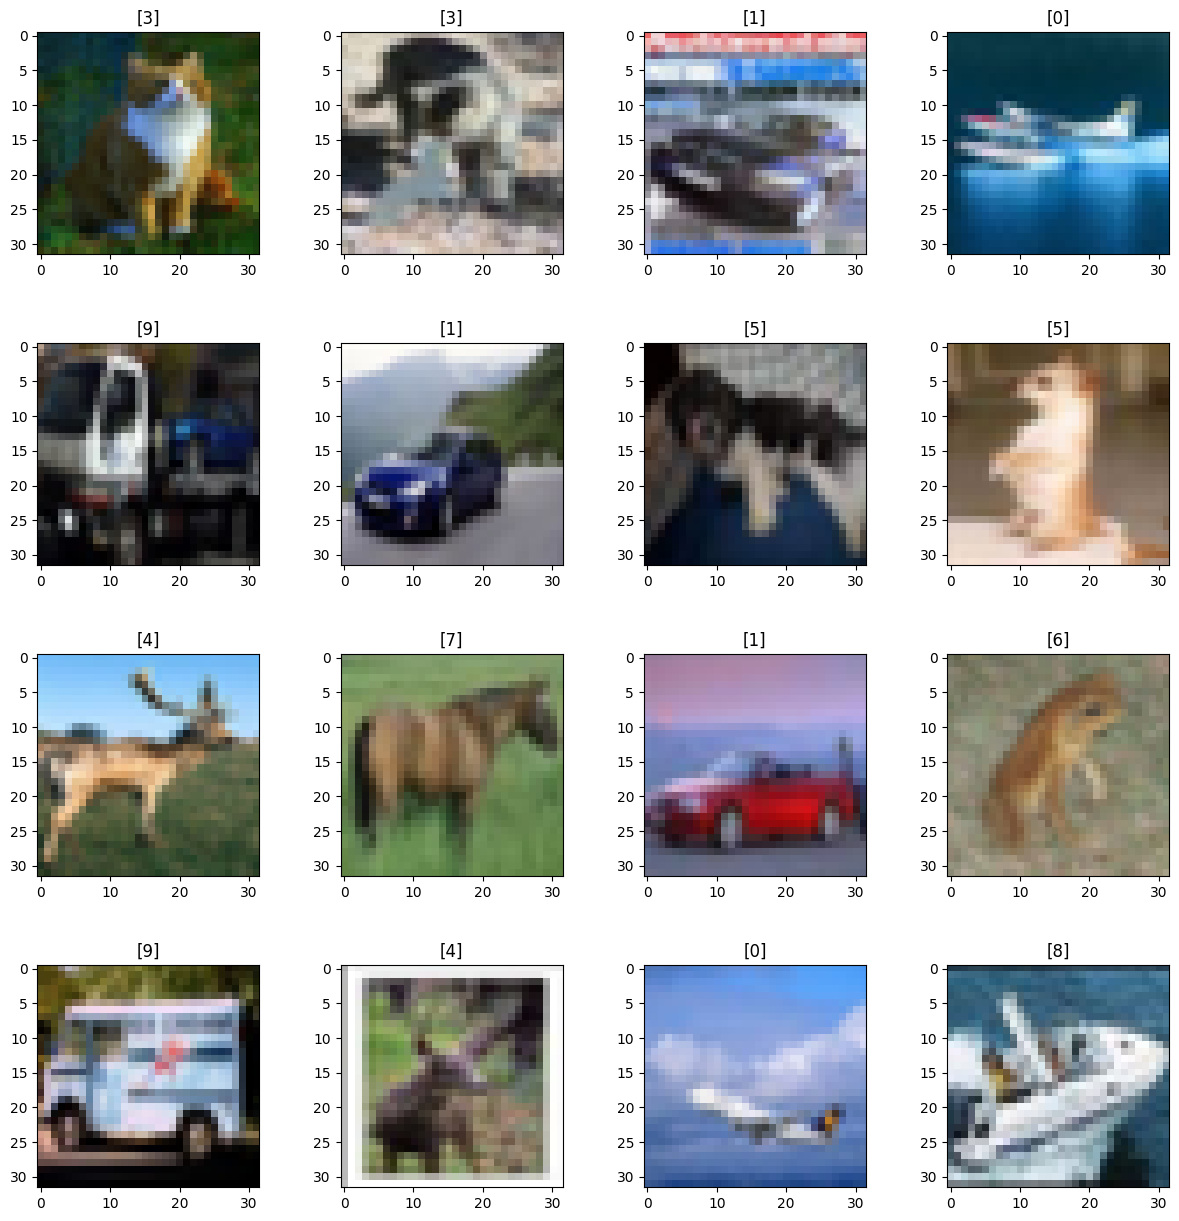

In [5]:
w_grid = 4
l_grid = 4

fig, axes = plt.subplots(w_grid, l_grid, figsize=(15, 15))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, w_grid * l_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
plt.subplots_adjust(hspace=0.4)


In [34]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [8]:
number_cat = 10

In [38]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [40]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [42]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
input_shape = (x_train.shape[1:])

In [45]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(3,2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3)))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(3,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))
cnn.add(tf.keras.layers.Dense(10, activation='softmax')) # The output layer should have 10 units (num_classes)

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 9, 9, 64)          36928     
                                                      

In [46]:
cnn.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss ='categorical_crossentropy', metrics=['accuracy'])

In [47]:
epochs = 100
history = cnn.fit(x_train, y_train, batch_size=512, epochs= epochs)

Epoch 1/100
98/98 [==============================] - 5s 36ms/step - loss: 2.2271 - accuracy: 0.1491
Epoch 2/100
98/98 [==============================] - 3s 35ms/step - loss: 1.9973 - accuracy: 0.2607
Epoch 3/100
98/98 [==============================] - 3s 34ms/step - loss: 1.8917 - accuracy: 0.3059
Epoch 4/100
98/98 [==============================] - 3s 34ms/step - loss: 1.8251 - accuracy: 0.3291
Epoch 5/100
98/98 [==============================] - 3s 34ms/step - loss: 1.7725 - accuracy: 0.3512
Epoch 6/100
98/98 [==============================] - 4s 36ms/step - loss: 1.7220 - accuracy: 0.3679
Epoch 7/100
98/98 [==============================] - 3s 34ms/step - loss: 1.6718 - accuracy: 0.3886
Epoch 8/100
98/98 [==============================] - 3s 34ms/step - loss: 1.6266 - accuracy: 0.4066
Epoch 9/100
98/98 [==============================] - 3s 34ms/step - loss: 1.5837 - accuracy: 0.4226
Epoch 10/100
98/98 [==============================] - 3s 35ms/step - loss: 1.5488 - accuracy: 0.4376